# 12 - Twin Axes 

Twin Axes terjadi ketika terdapat dua plotting yang dilakukan pada axes yang berbeda, namun kedua axes tersebut akan ditempatkan secara bertumpukan bersama.

## Import Modules

Di bawah ini merupakan magic comment yang berfungsi untuk memastikan bahwa setiap output yang dihasilkan oleh matplotlib akan ditampilkan dalam halaman notebook yang sama.

In [1]:
%matplotlib inline

Modules yang digunakan:
1. matplotlib
2. matplotlib.pyplot (module utama untuk melakukan plotting data)
3. numpy 

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

- Mengecheck versi dari 2 module yang digunakan yaitu matplotlib dan numpy

In [3]:
print(matplotlib.__version__)
print(np.__version__)

3.2.2
1.18.5


## Kasus Twin Axes 1

- Membuat sebuah data set yang ditampung oleh variabel *x* dengan memanggil `np.linspace()` yang disertai oleh 3 parameter
    - parameter pertama = 1, untuk menentukan nilai terkecil
    - parameter kedua = 10, untuk menentukan nilai terbesar
    - parameter ketiga = 25, untuk menentukan jumlah data point.

In [4]:
x = np.linspace(1, 10, 25)
x

array([ 1.   ,  1.375,  1.75 ,  2.125,  2.5  ,  2.875,  3.25 ,  3.625,
        4.   ,  4.375,  4.75 ,  5.125,  5.5  ,  5.875,  6.25 ,  6.625,
        7.   ,  7.375,  7.75 ,  8.125,  8.5  ,  8.875,  9.25 ,  9.625,
       10.   ])

Pada plotting ini, terdapat 1 sumbu-x dan 2 sumbu-y.
- Sumbu y di sebelah kiri akan berkorelasi dengan nilai eksponensial
- Sumbu y di sebelah kiri akan berkorelasi dengan nilai logaritma

*Plotting yang digunakan menggunakan OO style yang ditunjukkan dengan pemanggilan plt.subplots()*

- Pemanggilan `plt.subplots()` akan mengembalikan dua buah objek yang akan ditampung oleh dua variabel yaitu `fig` untuk menampung figure dan `ax1` untuk menampung axes.

#### Melakukan plotting untuk fungsi eksponensial
- Memanggil `ax1.plot()` yang disertai oleh 4 variabel.
    - `x`, untuk dijadikan nilai pada sumbu-x
    - `np.exp(x)` yaitu hasil eksponesial dari nilai x, untuk dijadikan nilai pada sumbu-y
    - `bs-`, b=blue, s=square, dan - untuk mengindikasikan adanya garis.
    - `label = 'exp' `
- Menentukan x label dan y label dengan memanggil
    - `ax1.set_xlabel('Sumbu X')`
    - `ax1.set_ylabel('exp')`
    
#### Melakukan plotting untuk fungsi logaritma    
- Memanggil fungsi `twinx()` untuk menghasilkan axes baru yang akan ditempatkan di atas axes yang pertama yang akan ditampung oleh variabel `ax2`.
- Memanggil `ax2.plot()` yang disertai oleh 4 variabel.
    - `x`, untuk dijadikan nilai pada sumbu-x
    - `np.log(x)` yaitu hasil logaritma dari nilai x, untuk dijadikan nilai pada sumbu-y
    - `ro-`, r=red, o merepresentasikan markernya berupa bulatan, dan - untuk mengindikasikan adanya garis.
    - `label = 'log' `
- Menentukan x label dan y label dengan memanggil
    - `ax1.set_xlabel('Sumbu X')`
    - `ax1.set_ylabel('exp')`

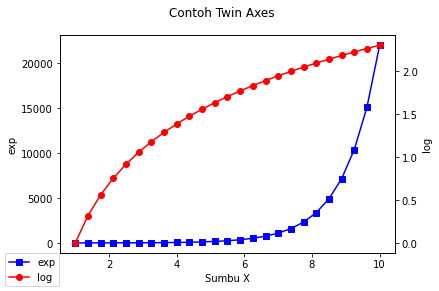

In [5]:
fig, ax1 = plt.subplots()

ax1.plot(x, np.exp(x), 'bs-', label='exp')
ax1.set_xlabel('Sumbu X')
ax1.set_ylabel('exp')

ax2 = ax1.twinx()
ax2.plot(x, np.log(x), 'ro-', label='log')
ax2.set_ylabel('log')

fig.suptitle('Contoh Twin Axes')
fig.legend(loc='lower left')

plt.show()

## Kasus Twin Axes 2

- Membuat sebuah data set yang ditampung oleh variabel *x* dengan memanggil `np.random.randint()` untuk menghasilkan kumpulan bilangan integer secara random yang disertai oleh 3 parameter
    - parameter pertama = 16, untuk menentukan nilai terkecil
    - parameter kedua = 40, untuk menentukan nilai terbesar
    - parameter ketiga size = 30, untuk menentukan jumlah data point.

In [6]:
x = np.random.randint(16, 40, size=30)
x

array([23, 34, 29, 20, 18, 23, 37, 37, 27, 26, 19, 27, 29, 33, 17, 32, 25,
       25, 21, 33, 23, 18, 16, 24, 39, 20, 37, 16, 35, 30])

- Membuat fungsi `C2F` yang akan menerima sebuah nilai dari derajat celcius yang nantinya akan dikonversi ke fahrenheit = `(celsius * 1.8) + 32`
- Membuat fungsi `konversi_sumbu(ax1)` yang akan mengkonversi sumbu-y pertama ke sumbu-y kedua.

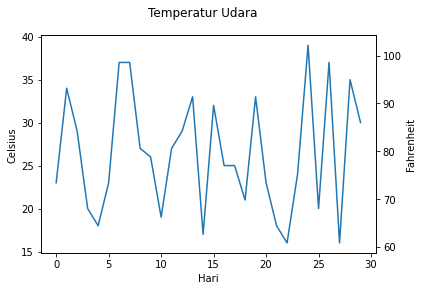

In [7]:
def C2F(celsius=0):
    return (celsius * 1.8) + 32

def konversi_sumbu(ax1): 
    y1, y2 = ax1.get_ylim() 
    ax2.set_ylim(C2F(y1), C2F(y2)) 
    ax2.figure.canvas.draw() 

fig, ax1 = plt.subplots() 
ax2 = ax1.twinx() 

ax1.callbacks.connect('ylim_changed', konversi_sumbu) 
ax1.plot(x) 

ax1.set_xlabel('Hari')
ax1.set_ylabel('Celsius') 
ax2.set_ylabel('Fahrenheit') 

fig.suptitle('Temperatur Udara') 
plt.show()